In [32]:
import pandas as pd
import numpy as np


In [33]:
mutations = pd.read_table('/Users/harrisonma/Documents/PhD Classes/2025 Spring/BNFO 285/BNFO285_Projects/Data/original/TCGA.HNSC.mutations.txt')
mutations


,patient_id,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Variant_Classification,...,SIFT,PolyPhen,DOMAINS,IMPACT,VARIANT_CLASS,FILTER,COSMIC,CALLERS,CONTEXT,NCALLERS
0,TCGA-4P-AA8J,PIP4K2A,0,.,GRCh37,10,22830863,22830863,+,Silent,...,.,.,"Low_complexity_(Seg):seg,PROSITE_profiles:PS51...",LOW,SNV,common_in_exac,NONE,MUTECT|VARSCANS,CTCTCGCCCTC,2
1,TCGA-4P-AA8J,NRP1,0,.,GRCh37,10,33495214,33495214,+,Intron,...,.,.,.,MODIFIER,SNV,PASS,NONE,MUTECT|RADIA|SOMATICSNIPER|MUSE|VARSCANS,CATCTCTTCTT,5
2,TCGA-4P-AA8J,PFKFB3,0,.,GRCh37,10,6257188,6257188,+,Silent,...,.,.,"Superfamily_domains:SSF52540,PIRSF_domain:PIRS...",LOW,SNV,PASS,NONE,RADIA|MUTECT|MUSE|VARSCANS,GTGTTCAACGT,4
3,TCGA-4P-AA8J,VCL,0,.,GRCh37,10,75849918,75849918,+,Silent,...,.,.,"hmmpanther:PTHR18914:SF22,hmmpanther:PTHR18914...",LOW,SNV,PASS,BUFFER|p.A440D|c.1319C>A|3,RADIA|MUTECT|MUSE|VARSCANS,GAAATATCTGC,4
4,TCGA-4P-AA8J,WAPAL,0,.,GRCh37,10,88260246,88260246,+,Missense_Mutation,...,tolerated_low_confidence(0.77),benign(0),"hmmpanther:PTHR22100:SF13,hmmpanther:PTHR22100",MODERATE,SNV,PASS,NONE,MUTECT|MUSE|VARSCANS,TAAAATACAGT,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124845,TCGA-WA-A7H4,TSNARE1,0,.,GRCh37,8,143381872,143381872,+,Missense_Mutation,...,tolerated(0.07),possibly_damaging(0.847),"PROSITE_profiles:PS50192,hmmpanther:PTHR19957:...",MODERATE,SNV,PASS,NONE,MUTECT|MUSE|VARSCANS,CCTCCCGCAGC,3
124846,TCGA-WA-A7H4,TOX,0,.,GRCh37,8,59728263,59728263,+,Silent,...,.,.,"hmmpanther:PTHR13711,hmmpanther:PTHR13711:SF15...",LOW,SNV,PASS,NONE,RADIA|MUTECT|MUSE|VARSCANS,TTCACGTCAAC,4
124847,TCGA-WA-A7H4,RDH10,0,.,GRCh37,8,74235183,74235183,+,Missense_Mutation,...,tolerated(0.2),possibly_damaging(0.504),"hmmpanther:PTHR24316:SF309,hmmpanther:PTHR2431...",MODERATE,SNV,PASS,NONE,MUTECT|MUSE,GTATCGGTTCC,2
124848,TCGA-WA-A7H4,FAM154A,0,.,GRCh37,9,18927993,18927993,+,3'UTR,...,.,.,.,MODIFIER,SNV,PASS,NONE,MUTECT|MUSE,ATAATTCTCAG,2


In [34]:
mutations['VARIANT_CLASS'].value_counts()


VARIANT_CLASS
SNV             120829
deletion          2800
insertion         1080
substitution       141
Name: count, dtype: int64

In [35]:
# check the row where mutations['NCALLERS'] is max
mutations['NCALLERS'].max()
mutations[mutations['NCALLERS'] == 7]


,patient_id,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Variant_Classification,...,SIFT,PolyPhen,DOMAINS,IMPACT,VARIANT_CLASS,FILTER,COSMIC,CALLERS,CONTEXT,NCALLERS
27608,TCGA-CN-A641,NSD1,0,.,GRCh37,5,176707784,176707786,+,Frame_Shift_Ins,...,.,.,"PROSITE_profiles:PS50280,hmmpanther:PTHR22884,...",HIGH,substitution,PASS,NONE,PINDEL|SOMATICSNIPER*|VARSCANI*|INDELOCATOR*|M...,AATTTTCCGCACAT,7
33858,TCGA-CQ-A4CG,DGAT2L6,0,.,GRCh37,X,69420163,69420163,+,Frame_Shift_Ins,...,.,.,"hmmpanther:PTHR12317:SF11,hmmpanther:PTHR12317...",HIGH,substitution,PASS,NONE,PINDEL|SOMATICSNIPER*|VARSCANI*|INDELOCATOR*|M...,ACCCCCATGGCA,7


In [36]:
# from mutations['CALLERS'], remove str matching 'RADIA' and 'SOMATICSNIPER'
mutations['CALLERS'] = mutations['CALLERS'].replace(to_replace='*', value='')
mutations['CALLERS'] = mutations['CALLERS'].replace(to_replace='RADIA', value='')
mutations['CALLERS'] = mutations['CALLERS'].replace(to_replace='SOMATICSNIPER', value='')
# in mutations['CALLERS'], if 2 '|' are next to each other, replace with ''
mutations['CALLERS'] = mutations['CALLERS'].replace(to_replace='\\|\\|', value='', regex=True)


In [37]:
# count the number of '|' in mutations['CALLERS'] and store in a new column 'CALLERS_COUNT_ADJUSTED'
mutations['CALLERS_COUNT_ADJUSTED'] = mutations['CALLERS'].str.count('\\|')


<Axes: >

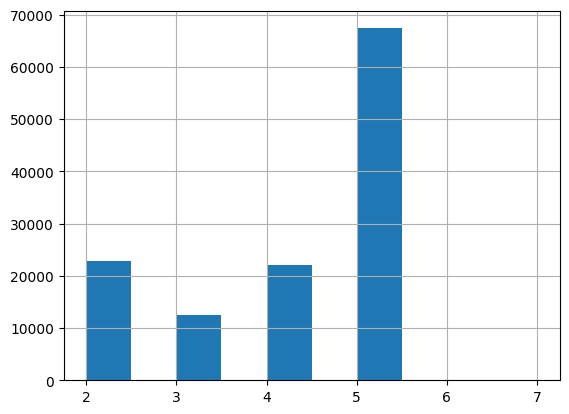

In [38]:
mutations['NCALLERS'].hist()


In [ ]:
mutations = mutations[mutations['CALLERS_COUNT_ADJUSTED'] > 1]
mutations


,patient_id,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Variant_Classification,...,PolyPhen,DOMAINS,IMPACT,VARIANT_CLASS,FILTER,COSMIC,CALLERS,CONTEXT,NCALLERS,CALLERS_COUNT_ADJUSTED
1,TCGA-4P-AA8J,NRP1,0,.,GRCh37,10,33495214,33495214,+,Intron,...,.,.,MODIFIER,SNV,PASS,NONE,MUTECT|RADIA|SOMATICSNIPER|MUSE|VARSCANS,CATCTCTTCTT,5,4
2,TCGA-4P-AA8J,PFKFB3,0,.,GRCh37,10,6257188,6257188,+,Silent,...,.,"Superfamily_domains:SSF52540,PIRSF_domain:PIRS...",LOW,SNV,PASS,NONE,RADIA|MUTECT|MUSE|VARSCANS,GTGTTCAACGT,4,3
3,TCGA-4P-AA8J,VCL,0,.,GRCh37,10,75849918,75849918,+,Silent,...,.,"hmmpanther:PTHR18914:SF22,hmmpanther:PTHR18914...",LOW,SNV,PASS,BUFFER|p.A440D|c.1319C>A|3,RADIA|MUTECT|MUSE|VARSCANS,GAAATATCTGC,4,3
4,TCGA-4P-AA8J,WAPAL,0,.,GRCh37,10,88260246,88260246,+,Missense_Mutation,...,benign(0),"hmmpanther:PTHR22100:SF13,hmmpanther:PTHR22100",MODERATE,SNV,PASS,NONE,MUTECT|MUSE|VARSCANS,TAAAATACAGT,3,2
5,TCGA-4P-AA8J,MUC2,0,.,GRCh37,11,1080567,1080567,+,Silent,...,.,"PROSITE_profiles:PS51233,hmmpanther:PTHR11339,...",LOW,SNV,PASS,NONE,RADIA|MUTECT|MUSE|VARSCANS,TTCGATGGGAA,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124838,TCGA-WA-A7H4,CLPS,0,.,GRCh37,6,35765036,35765036,+,Silent,...,.,"Low_complexity_(Seg):seg,Transmembrane_helices...",LOW,SNV,PASS,NONE,RADIA|MUTECT|MUSE|VARSCANS,AGGGCGACAAG,4,3
124840,TCGA-WA-A7H4,CENPQ,0,.,GRCh37,6,49448713,49448713,+,Missense_Mutation,...,benign(0.022),"hmmpanther:PTHR31345,hmmpanther:PTHR31345:SF2,...",MODERATE,SNV,PASS,NONE,RADIA|MUTECT|MUSE|VARSCANS,TGGAAGATTTA,4,3
124845,TCGA-WA-A7H4,TSNARE1,0,.,GRCh37,8,143381872,143381872,+,Missense_Mutation,...,possibly_damaging(0.847),"PROSITE_profiles:PS50192,hmmpanther:PTHR19957:...",MODERATE,SNV,PASS,NONE,MUTECT|MUSE|VARSCANS,CCTCCCGCAGC,3,2
124846,TCGA-WA-A7H4,TOX,0,.,GRCh37,8,59728263,59728263,+,Silent,...,.,"hmmpanther:PTHR13711,hmmpanther:PTHR13711:SF15...",LOW,SNV,PASS,NONE,RADIA|MUTECT|MUSE|VARSCANS,TTCACGTCAAC,4,3


<Axes: >

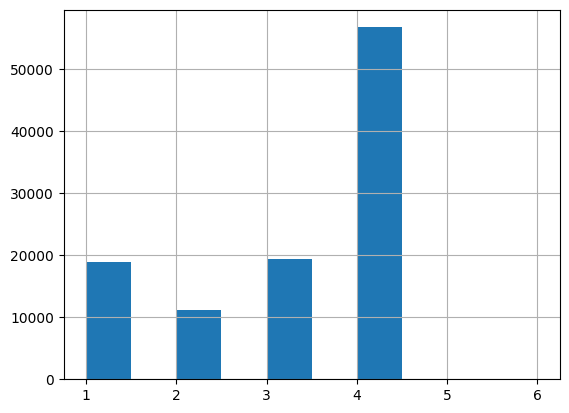

In [31]:
# plot a distribution of number of NCALLERS
mutations['CALLERS_COUNT_ADJUSTED'].hist()


<Axes: >

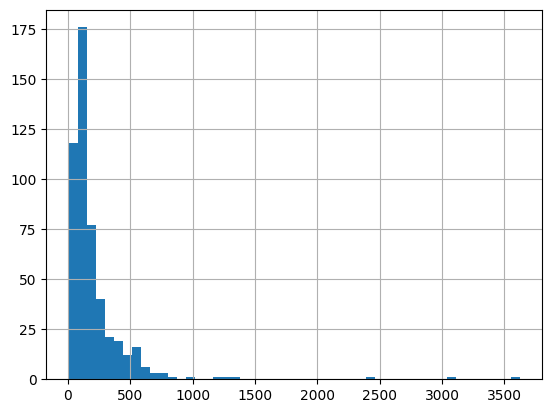

In [41]:
mutations['patient_id'].value_counts().hist(bins=50) 


In [42]:
mutations['patient_id'].value_counts()[:10]


patient_id
TCGA-F7-A624    3621
TCGA-CV-7568    3054
TCGA-D6-6516    2401
TCGA-CV-6961    1320
TCGA-CV-7245    1244
TCGA-CR-7402    1194
TCGA-CN-4723    1018
TCGA-BA-A6DA     840
TCGA-CV-A6K2     782
TCGA-TN-A7HL     769
Name: count, dtype: int64

In [43]:
# remove patiant_id TCGA-F7-A624,TCGA-CV-7568,TCGA-D6-6516,TCGA-CN-6010,TCGA-CV-6961,TCGA-CV-7245,TCGA-CR-7402,TCGA-CN-4723,TCGA-CR-7388
mutations = mutations[~mutations['patient_id'].isin(['TCGA-F7-A624','TCGA-CV-7568','TCGA-D6-6516','TCGA-CV-6961','TCGA-CV-7245','TCGA-CR-7402','TCGA-CN-4723'])]
mutations


,patient_id,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Variant_Classification,...,PolyPhen,DOMAINS,IMPACT,VARIANT_CLASS,FILTER,COSMIC,CALLERS,CONTEXT,NCALLERS,CALLERS_COUNT_ADJUSTED
1,TCGA-4P-AA8J,NRP1,0,.,GRCh37,10,33495214,33495214,+,Intron,...,.,.,MODIFIER,SNV,PASS,NONE,MUTECT|RADIA|SOMATICSNIPER|MUSE|VARSCANS,CATCTCTTCTT,5,4
2,TCGA-4P-AA8J,PFKFB3,0,.,GRCh37,10,6257188,6257188,+,Silent,...,.,"Superfamily_domains:SSF52540,PIRSF_domain:PIRS...",LOW,SNV,PASS,NONE,RADIA|MUTECT|MUSE|VARSCANS,GTGTTCAACGT,4,3
3,TCGA-4P-AA8J,VCL,0,.,GRCh37,10,75849918,75849918,+,Silent,...,.,"hmmpanther:PTHR18914:SF22,hmmpanther:PTHR18914...",LOW,SNV,PASS,BUFFER|p.A440D|c.1319C>A|3,RADIA|MUTECT|MUSE|VARSCANS,GAAATATCTGC,4,3
4,TCGA-4P-AA8J,WAPAL,0,.,GRCh37,10,88260246,88260246,+,Missense_Mutation,...,benign(0),"hmmpanther:PTHR22100:SF13,hmmpanther:PTHR22100",MODERATE,SNV,PASS,NONE,MUTECT|MUSE|VARSCANS,TAAAATACAGT,3,2
5,TCGA-4P-AA8J,MUC2,0,.,GRCh37,11,1080567,1080567,+,Silent,...,.,"PROSITE_profiles:PS51233,hmmpanther:PTHR11339,...",LOW,SNV,PASS,NONE,RADIA|MUTECT|MUSE|VARSCANS,TTCGATGGGAA,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124838,TCGA-WA-A7H4,CLPS,0,.,GRCh37,6,35765036,35765036,+,Silent,...,.,"Low_complexity_(Seg):seg,Transmembrane_helices...",LOW,SNV,PASS,NONE,RADIA|MUTECT|MUSE|VARSCANS,AGGGCGACAAG,4,3
124840,TCGA-WA-A7H4,CENPQ,0,.,GRCh37,6,49448713,49448713,+,Missense_Mutation,...,benign(0.022),"hmmpanther:PTHR31345,hmmpanther:PTHR31345:SF2,...",MODERATE,SNV,PASS,NONE,RADIA|MUTECT|MUSE|VARSCANS,TGGAAGATTTA,4,3
124845,TCGA-WA-A7H4,TSNARE1,0,.,GRCh37,8,143381872,143381872,+,Missense_Mutation,...,possibly_damaging(0.847),"PROSITE_profiles:PS50192,hmmpanther:PTHR19957:...",MODERATE,SNV,PASS,NONE,MUTECT|MUSE|VARSCANS,CCTCCCGCAGC,3,2
124846,TCGA-WA-A7H4,TOX,0,.,GRCh37,8,59728263,59728263,+,Silent,...,.,"hmmpanther:PTHR13711,hmmpanther:PTHR13711:SF15...",LOW,SNV,PASS,NONE,RADIA|MUTECT|MUSE|VARSCANS,TTCACGTCAAC,4,3


In [45]:
mutations.to_csv('/Users/harrisonma/Documents/PhD Classes/2025 Spring/BNFO 285/BNFO285_Projects/project_2/project_2_data/TCGA_HNSC_mutations_cleaned.txt', index=False, sep='\t')
